# COMP578 Data Mining Spring 2017
## Assignment 2

### Task 1
##### 5 points

Create a Pandas data frame from [Mammographic Mass Data Set](http://archive.ics.uci.edu/ml/datasets/Mammographic+Mass) from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/).

You must use the URI of the set for obtaining the file directly from the repository.

Note that there are certain missing values in the set, so you will need to assign `np.NaN` to all missing values.

> Please note that the last column is not a feature vector; it is the classification category.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import urllib

%matplotlib notebook

In [2]:
url_data = "http://archive.ics.uci.edu/ml/machine-learning-databases/mammographic-masses/mammographic_masses.data"

## Columns: BI-RADS Assessment, Age, Shape, Margin, Density, Severity
names = ['BI-RADS', 'Age', 'Shape','Margin','Density','Severity']
data = pd.read_csv(url_data, header=None, names=names, na_values='?')

data = data[((data['BI-RADS'] - data['BI-RADS'].mean()) / data['BI-RADS'].std()).abs() < 3] #remove outliers from BI-RADS that were affecting output

### Task 2
##### 3 Points

Using Pandas capabilities, create histograms for all predictors in the set. Plot all histograms as subplots in a single figure. Add the title `Mammographic Mass Feature Histograms` to the whole figure that contains the subplots with the individual histograms.

<IPython.core.display.Javascript object>


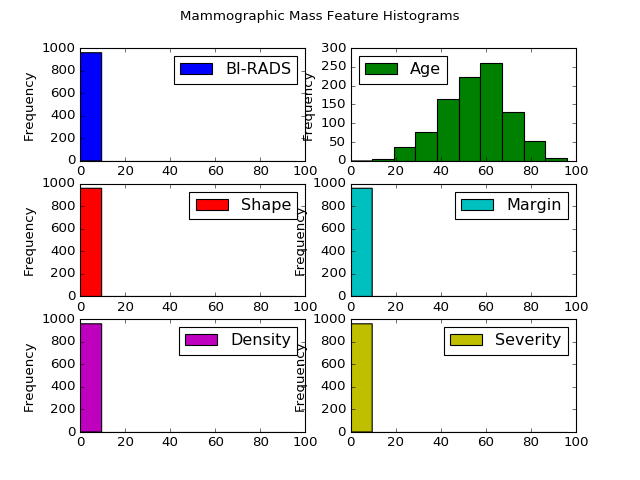

In [11]:
data.plot(kind='hist', subplots=True, layout=(3,2), sharex=False, title="Mammographic Mass Feature Histograms")
plt.show()

### Task 3
##### 2 Points

Create univariate density plots for all predictors drawn as subplots of a single figure. Add a title `Mammographic Mass Univariate Density Plots` to the whole figure.

<IPython.core.display.Javascript object>


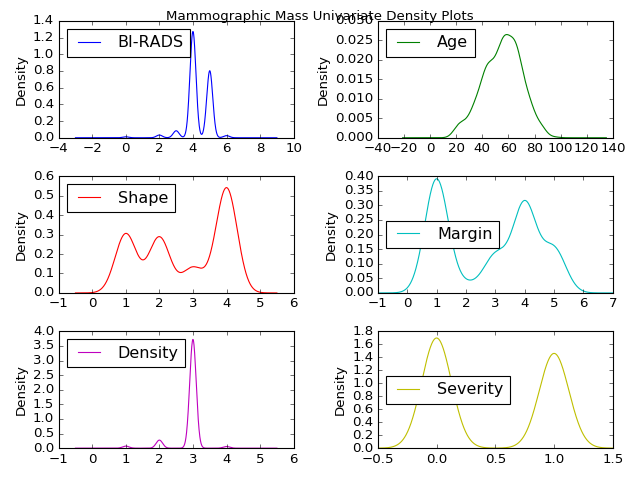

In [4]:
data.plot(kind='density', subplots=True, sharex=False, layout=(3,2),title="Mammographic Mass Univariate Density Plots")
plt.tight_layout()
plt.show()

### Task 4
##### 3 Points

Create a scatterplot matrix for all predictors drawn as subplots of a single figure. Add a title `Mammographic Mass Scatterplot Matrix` to the whole figure.

Use histograms for the diagonal.

<IPython.core.display.Javascript object>


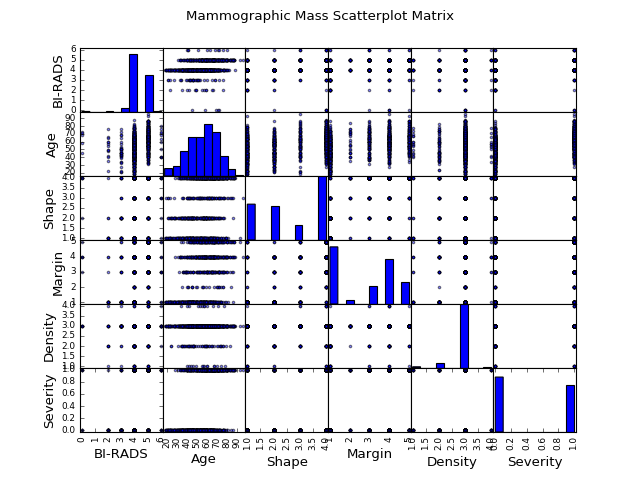

In [5]:
pd.tools.plotting.scatter_matrix(data, diagonal = 'hist')
plt.suptitle('Mammographic Mass Scatterplot Matrix')
plt.show()

### Task 5
##### 2 Points

Create a scatterplot matrix for all predictors drawn as subplots of a single figure. Add a title `Mammographic Mass Scatterplot Matrix` to the whole figure.

Use univariate density plots for the diagonal.

<IPython.core.display.Javascript object>


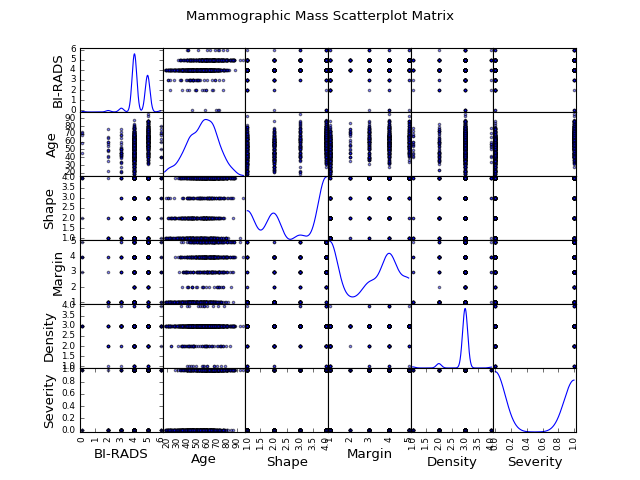

In [6]:
pd.tools.plotting.scatter_matrix(data, diagonal='density')
plt.suptitle('Mammographic Mass Scatterplot Matrix')
plt.show()

### Task 6
##### 10 Points

Create a Matplotlib figure with two subplots that show:
* LEFT: a histogram of benign and malignant cases based on age groups of size 5 with a title `Risk vs. Age`. For each age group there should be two bars for benign and malicious cases.
* RIGHT: a plot that shows the values of the features as a function of age with a title `Features vs. Age`. This subplot should include a legend that identifies the curves for each of the measurements.

The figure should have a title `Age Factor`.

Interpolate all missing values.

In [7]:
## LEFT DATA
data = data.interpolate(method='linear', axis=0, inplace=False)

data6_1 = data[['Age','Severity']]
data6_1 = data6_1.sort_values('Age')
data6_1_agebins = [15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
data6_1_ageranges = pd.cut(data6_1['Age'], data6_1_agebins)

data6_1['Age Range'] = data6_1_ageranges
freq_count_agerange = data6_1.groupby('Age Range').count()

data6_1 = data6_1.set_index('Age Range')
del data6_1['Age']

## Find row range for each age range
data6_1 = data6_1.reset_index()

data6_1 = data6_1.loc[data6_1['Age Range'] != np.NaN] # remove instances of NaN ages

data6_1['Benign'] = data6_1['Severity'] # data table for benign
data6_1['Malignant'] = data6_1['Severity'] # data table for malignant
del data6_1['Severity']

#create column for malignant and one for benign.
#Assign value of 1 for instances and NaN for no instance
#group by age range, then add up values in Benign and Malignant columns
data6_1['Benign'].replace(to_replace=1,value=np.NaN,inplace=True)
data6_1['Benign'].replace(to_replace=0,value=1,inplace=True)

data6_1['Malignant'].replace(to_replace=0,value=np.NaN,inplace=True)

data6_1 = data6_1.groupby('Age Range').sum()
data6_1 = data6_1.reset_index()

In [8]:
##RIGHT DATA
data6_2 = data.groupby('Age').mean() #Group the data by unique ages, then average out the rest! 

<IPython.core.display.Javascript object>


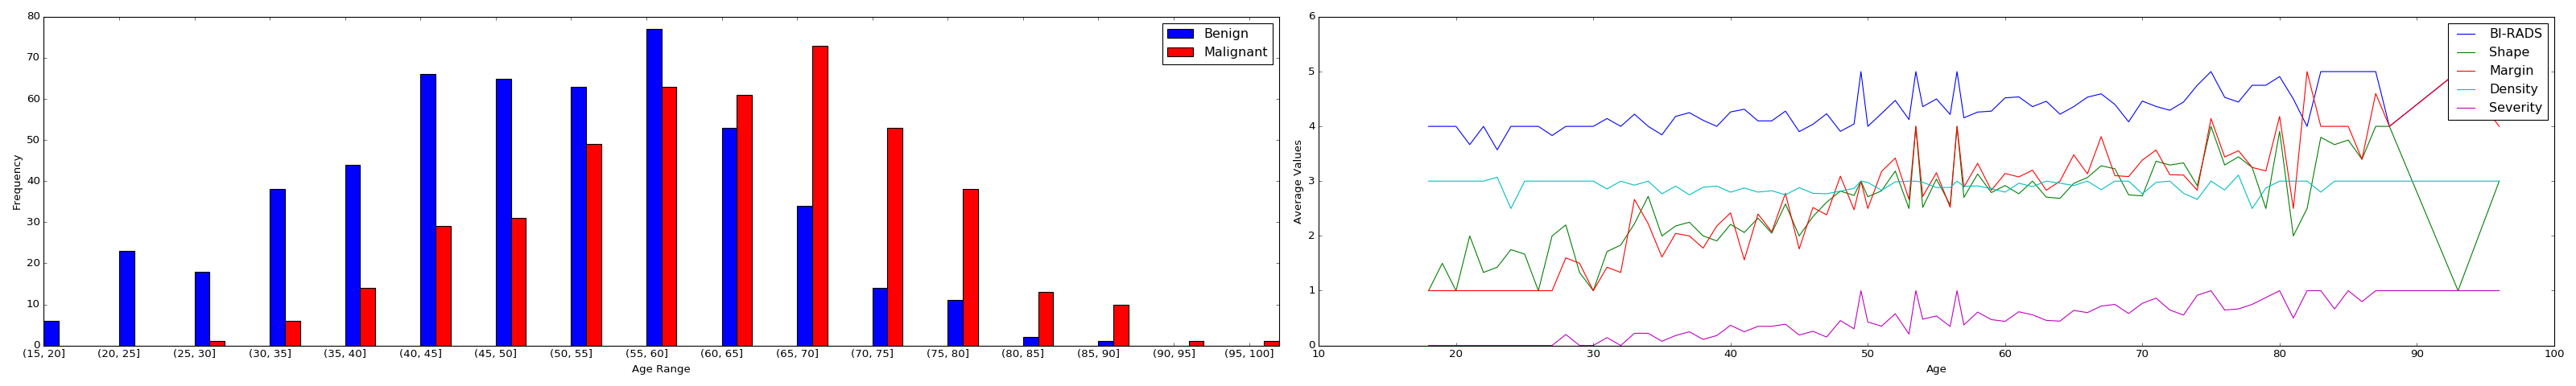

In [10]:
fig6 = plt.figure(figsize = (40,6))

#subplot 1
ax1 = fig6.add_subplot(1,2,1)

ax1.bar(data6_1.index-.2,data6_1['Benign'],width=0.2, tick_label=list(data6_1['Age Range'].unique()),label = 'Benign') #ax1.plot(data6_1.index,data6_1['Benign'],label='Benign')
ax1.bar(data6_1.index,data6_1['Malignant'],width=0.2,color='r',label='Malignant')

ax1.set_xlabel('Age Range')
ax1.set_ylabel('Frequency')
ax1.legend()

#subplot 2
ax2 = fig6.add_subplot(1,2,2)

label_list = list(data6_2.columns.values)
for value in label_list:
    if value != 'Age': #no Age vs Age graph
        ax2.plot(data6_2.index,data6_2[value],label=value)

ax2.set_ybound(0,6) #automatic bound was giving the impression
                    #that BI-RADS line was being cropped at the top
ax2.set_xlabel('Age')
ax2.set_ylabel('Average Values')
ax2.legend()

plt.tight_layout()
plt.show()

### Task 7
##### 10 Points

Create a figure with a number of subplots that show 2D scatter plots for every pair of features. For each pair, an `o` should be drawn if the pair is in a sample that is classified as bening, and `x` otherwise.

The size of the marker (`o` or `x`) should depend on the number of classifications for tat particular pair.

In [10]:
data7_1 = data.loc[data['Severity'] == 0] # data table for benign
data7_2 = data.loc[data['Severity'] == 1] # data table for malignant

<IPython.core.display.Javascript object>


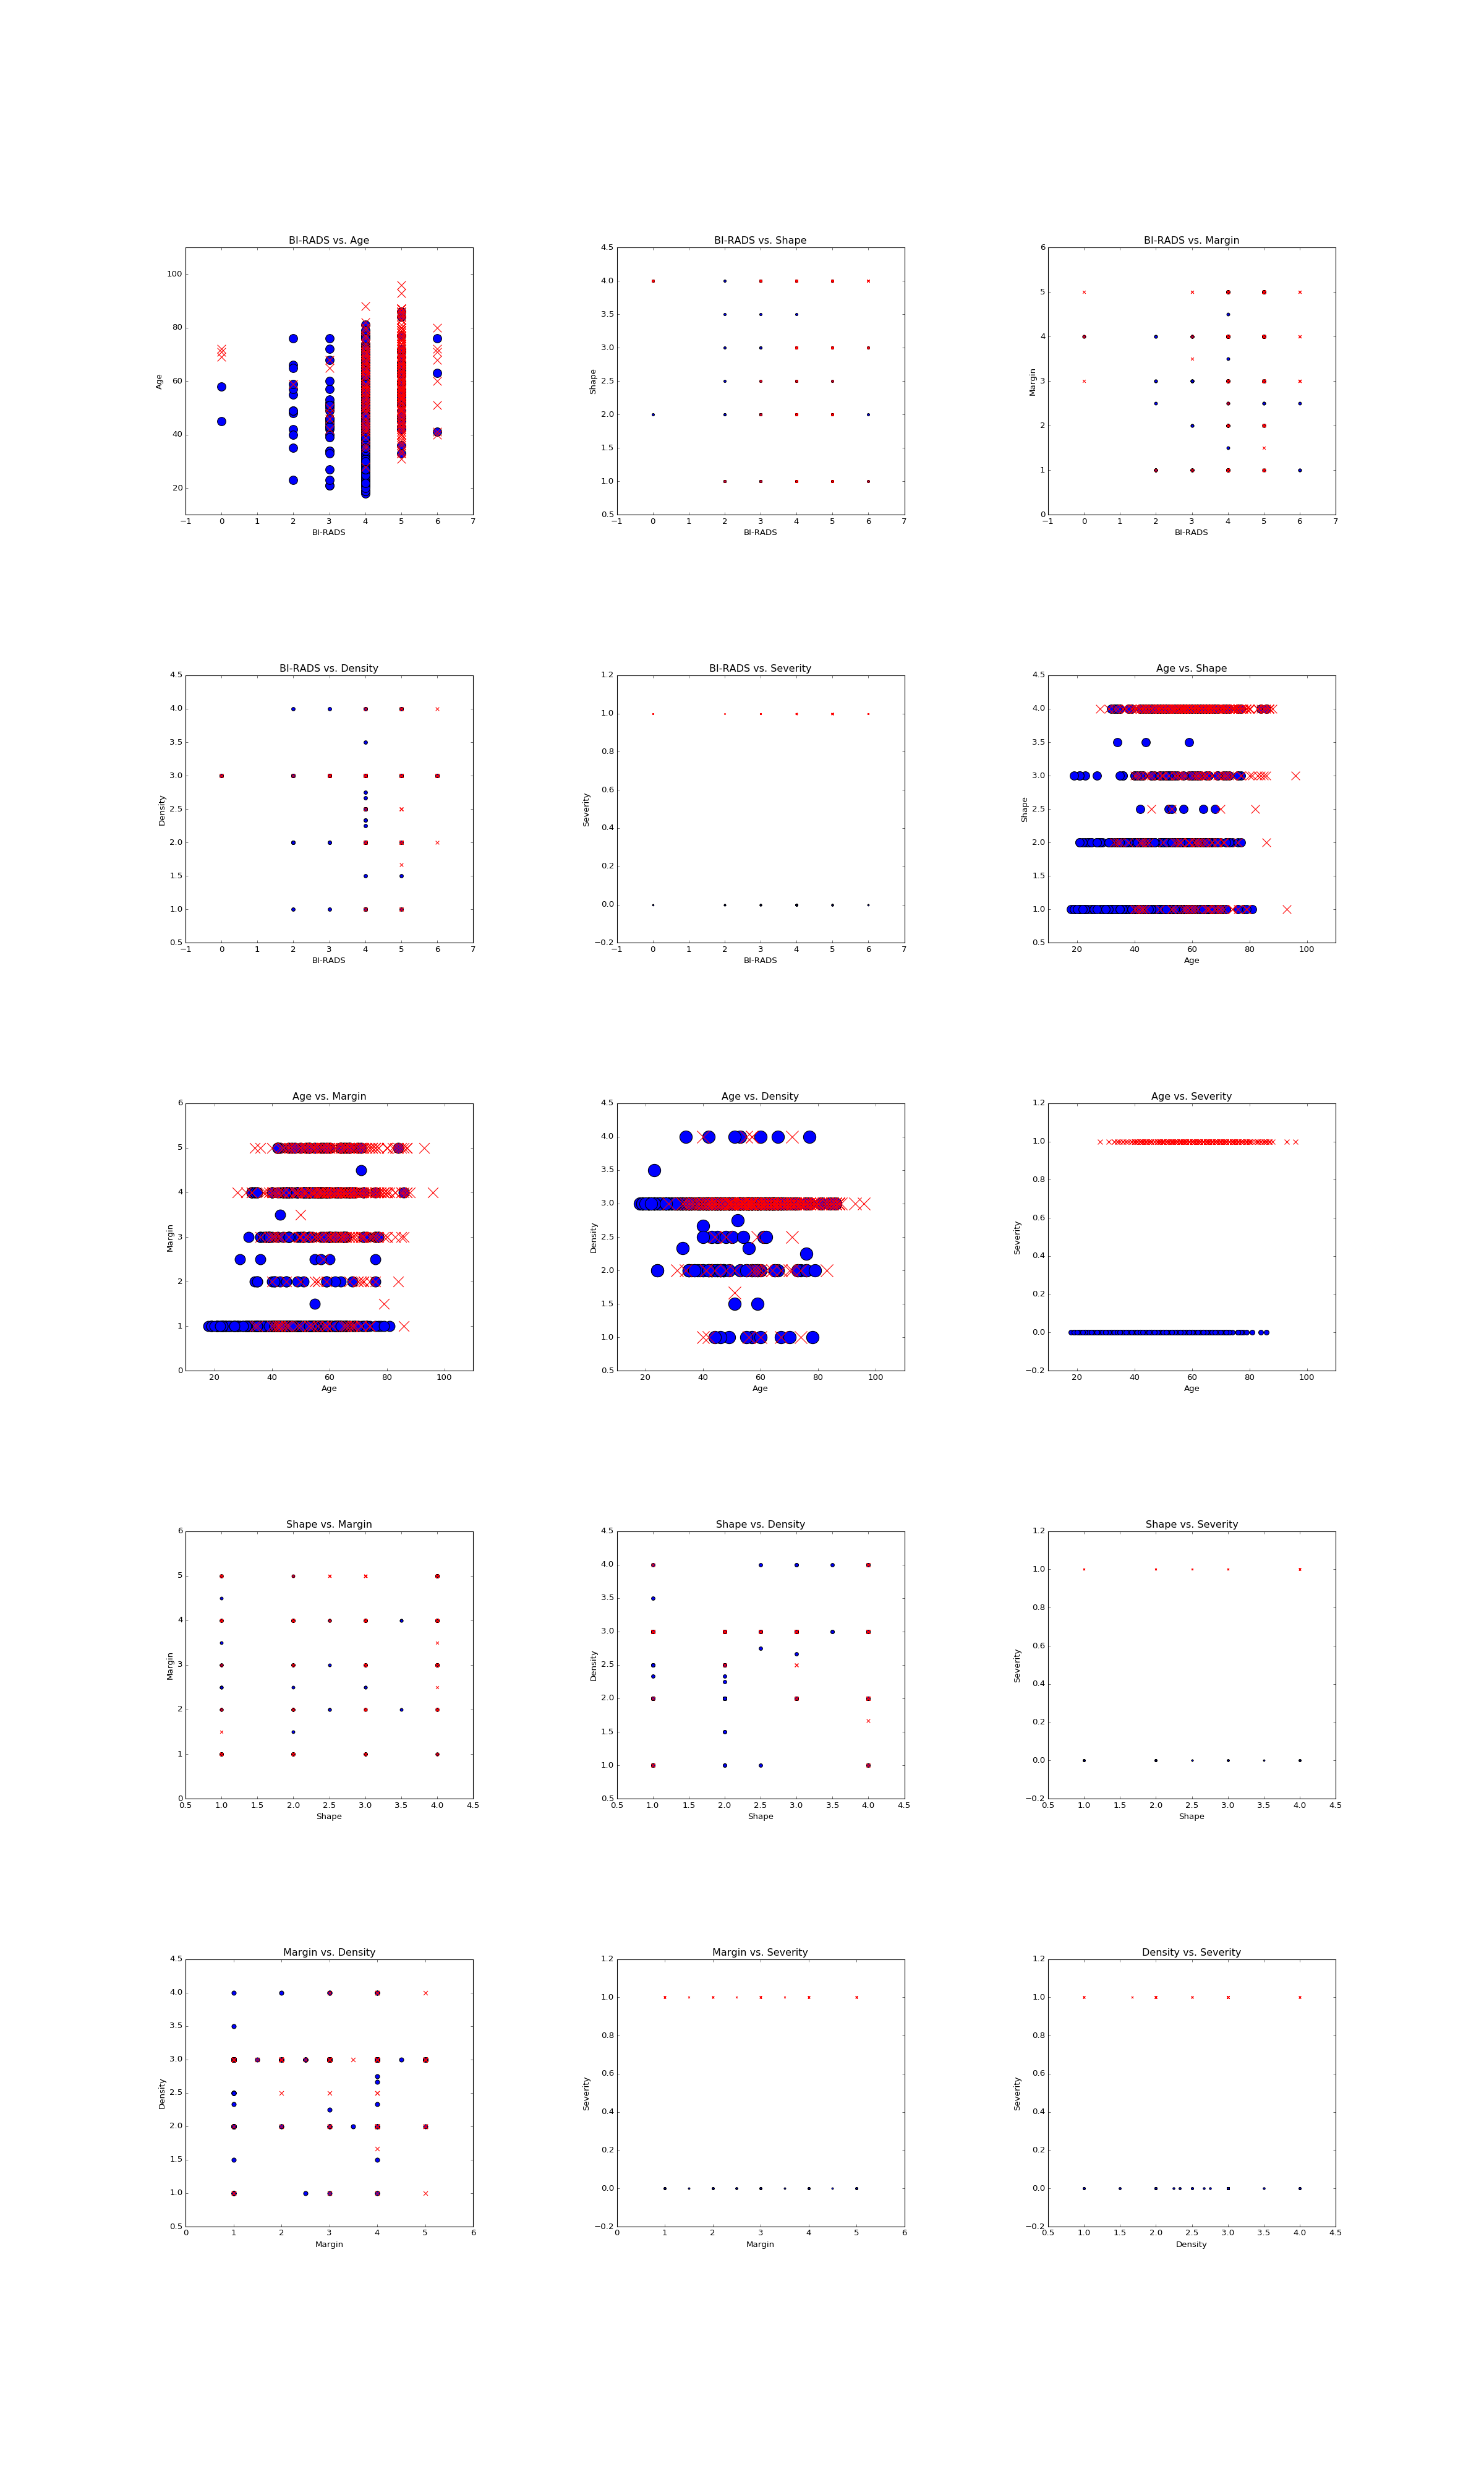

In [11]:
from itertools import combinations

def scatteraxes(ax_in,value1,value2):
    
    #Make marker size dependent on number of classifications (unique values in column)
    sizex = len(data[value1].unique())
    sizey = len(data[value2].unique())
    
    ax_in.scatter(x=data7_1[value1], y=data7_1[value2],s=(sizex*sizey)/3,c='b',marker='o') #plot benign
    ax_in.scatter(x=data7_2[value1], y=data7_2[value2],s=(sizex*sizey)/3,c='r',marker='x') #plot malignant
    ax_in.set_xlabel(value1) 
    ax_in.set_ylabel(value2)
    ax_in.set_title(str(value1) + ' vs. ' + str(value2))

label_list = list(data.columns.values) # assign column names to list, then generate all possible combinations (of pairs)
combo_list = list(combinations(label_list,2))
 
fig7 = plt.figure(figsize=(30,50))

for x in range (0, len(combo_list)):
    ax = fig7.add_subplot(5,3,x+1)
    scatteraxes(ax,combo_list[x][0],combo_list[x][1])

fig7.subplots_adjust(wspace=.5, hspace=.6)
fig7.tight_layout
plt.show()

### Task 8
##### 10 Points

Create a figure with a number of subplots showing 3D plots for each three-element subset of the features excluding the age.


Analyze the plots and evaluate which three features best predict whether the tumor is bening or malignant. That can be done by observing cluster formation for each combination.

<IPython.core.display.Javascript object>


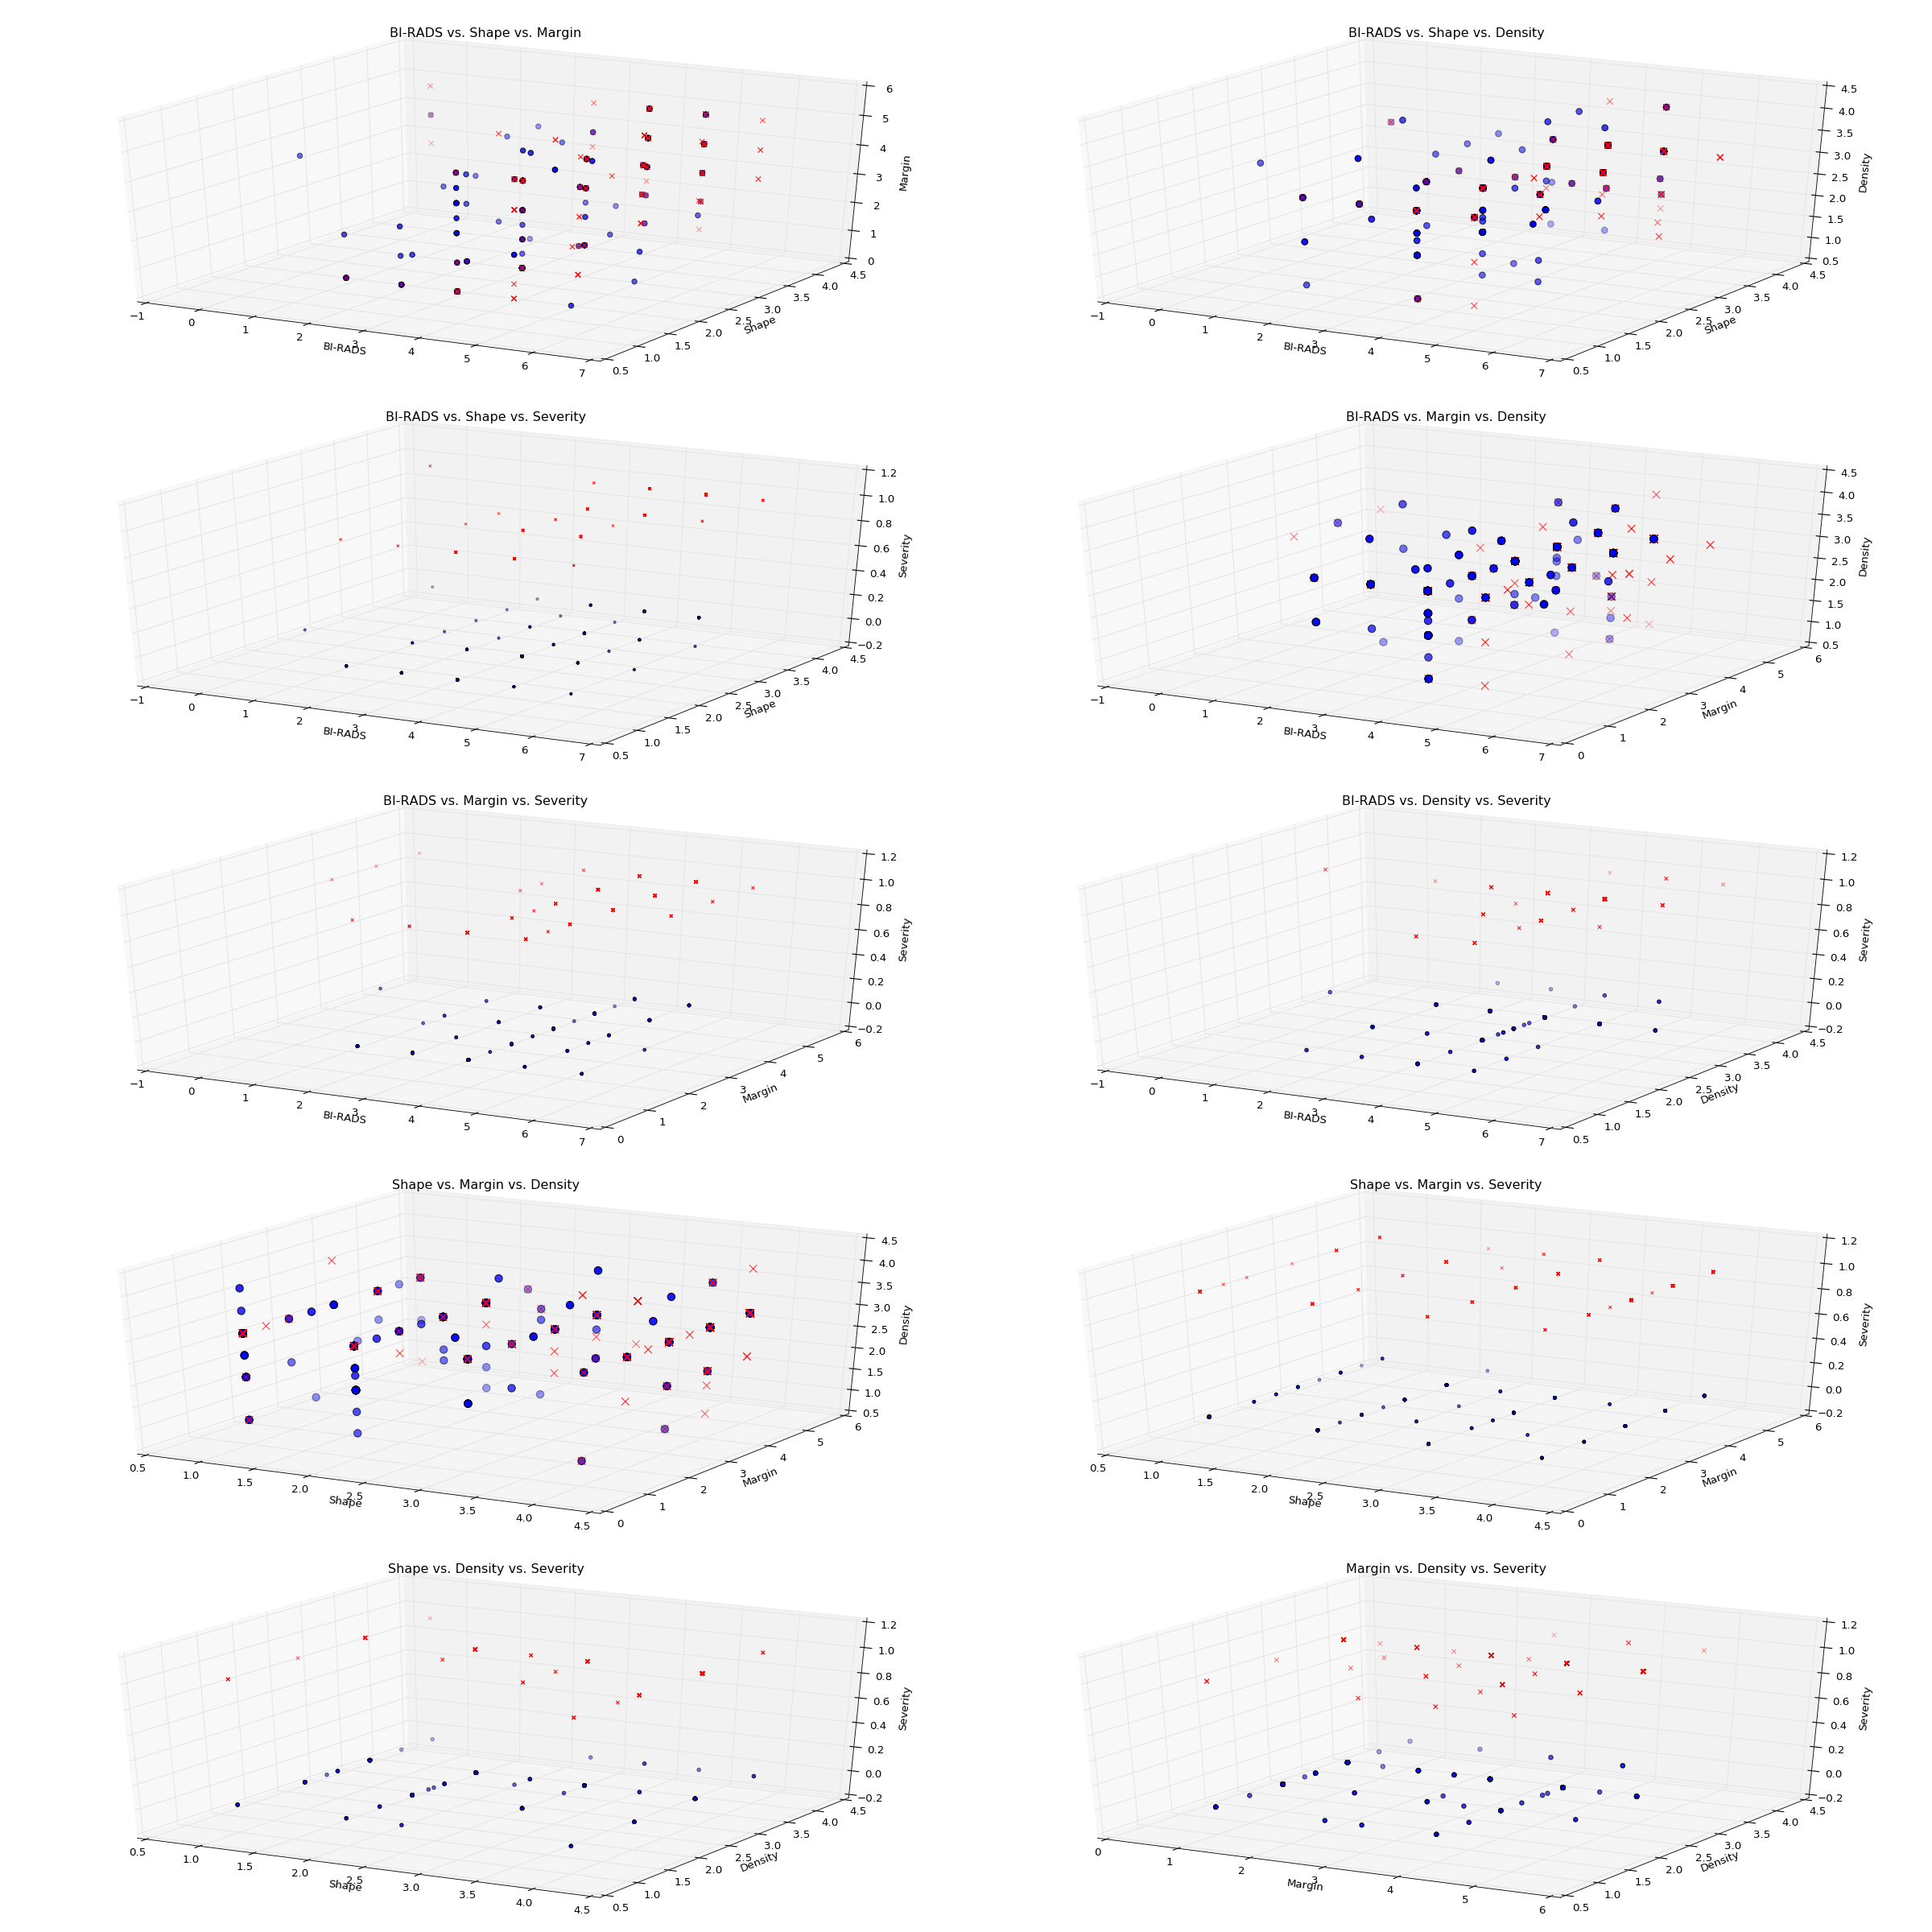

In [12]:
from mpl_toolkits.mplot3d import Axes3D

def scatteraxes_3d(ax_in,value1,value2,value3):
    
    #Make marker size dependent on number of classifications (unique values in column)
    sizex = len(data[value1].unique())
    sizey = len(data[value2].unique())
    sizez = len(data[value3].unique())
    
    ax_in.scatter(xs=data7_1[value1], ys=data7_1[value2], zs=data7_1[value3],s=(sizex*sizey*sizez)/10,c='b',marker='o')
    ax_in.scatter(xs=data7_2[value1], ys=data7_2[value2], zs=data7_2[value3],s=(sizex*sizey*sizez)/10,c='r',marker='x')
    
    ax_in.set_xlabel(value1)
    ax_in.set_ylabel(value2)
    ax_in.set_zlabel(value3)
    ax_in.set_title(str(value1) + ' vs. ' + str(value2) + ' vs. ' + str(value3))

label_list.remove('Age')
combo_list = list(combinations(label_list,3))  # reset for combinations of three
    
fig8 = plt.figure(figsize=(30,30))

for x in range (0, len(combo_list)):
    ax = fig8.add_subplot(5,2,x+1, projection='3d')
    scatteraxes_3d(ax,combo_list[x][0],combo_list[x][1],combo_list[x][2])

plt.tight_layout()
plt.show()

Based on these plots, I would conclude that the three key markers for malignancy are margin, shape, and age.